### Load The Dataset

In [2]:
import pandas as pd
hp = pd.read_csv(r"C:\Users\Yuvraj Bhavsar\OneDrive\Desktop\csv file\sqf_house_price.csv")
print(hp.head)

<bound method NDFrame.head of     sqf  house_price
0   800       150000
1  1200       220000
2  1500       280000
3  1800       320000
4  2000       360000
5  2200       400000
6  2500       450000
7  2800       500000
8  3000       550000
9  3200       600000>


In [3]:
m = len(hp)
print(m)

10


### Actual Plot

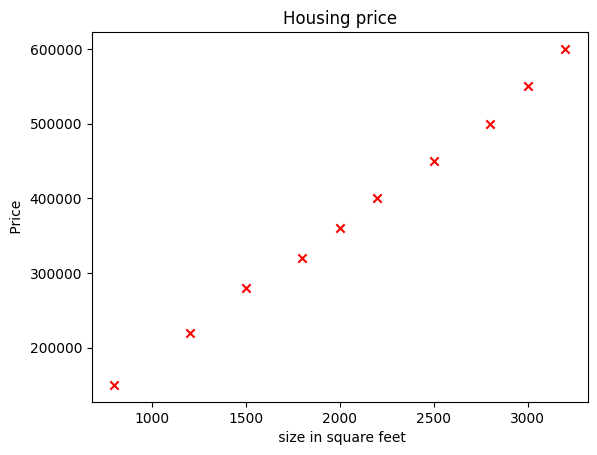

In [4]:
import matplotlib.pyplot as plt
x = hp['sqf'] 
y = hp['house_price']  

plt.scatter(x,y, marker = 'x', c = 'r')
plt.title("Housing price")
plt.xlabel(" size in square feet")
plt.ylabel(" Price ")
plt.show()

### Give value of w (omega or slope) and b (bias)

In [5]:
w = 203
b = 302
print(f"value of w : {w}")
print(f"value of b : {b}")

value of w : 203
value of b : 302


#### First we make stright line formula using python 

In [6]:
def compute_model_output(x, w, b):
  m = x.shape[0]
  f_wb = np.zeros(m)
  for i in range(m):
     f_wb[i] = w * x[i] + b
     
  return f_wb


### CHECK THE Actual VS Model 

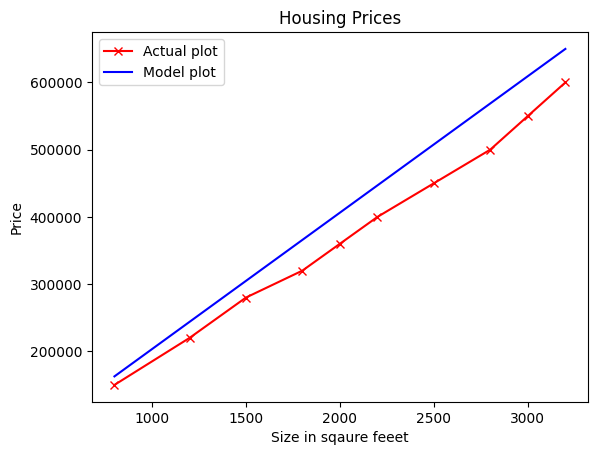

In [7]:
import numpy as np
tmp_f_wb = compute_model_output(x, w, b )

plt.plot(x,y, marker = 'x', c ='r', label = 'Actual plot')

plt.plot(x, tmp_f_wb, c = 'b', label = 'Model plot' )

plt.title('Housing Prices')
plt.xlabel('Size in sqaure feeet')
plt.ylabel("Price")
plt.legend()

plt.show()



## Let's Strat Making Model

## COST FUNCTION

In [8]:
def compute_cost(x, y, w, b):
    m = x.shape[0]  
    total_cost = 0
    for i in range(m):
        f_wb = w * x[i] + b  
        cost = (f_wb - y[i]) ** 2 
        total_cost += cost  
    return total_cost / (2 * m) 

# Gradient descent function

In [9]:
def gradient_descent(x, y, w, b, alpha=0.000000001, iterations=60):
    m = x.shape[0]  
    for _ in range(iterations):
        f_wb = compute_model_output(x, w, b)
        dw = 0
        db = 0
        
        for i in range(m):
            error = f_wb[i] - y[i]  
            dw = dw + error * x[i]  
            db = db + error  
        
        w -= alpha * (dw / m)
        b -= alpha * (db / m)

    return w, b  

w_final, b_final = gradient_descent(x, y, w, b, alpha=0.00000008, iterations=1000)

print(f"Final value of w: {w_final:.2f}")
print(f"Final value of b: {b_final:.2f}")


Final value of w: 182.32
Final value of b: 301.98


## After *GDA* Actual vs Prediction result

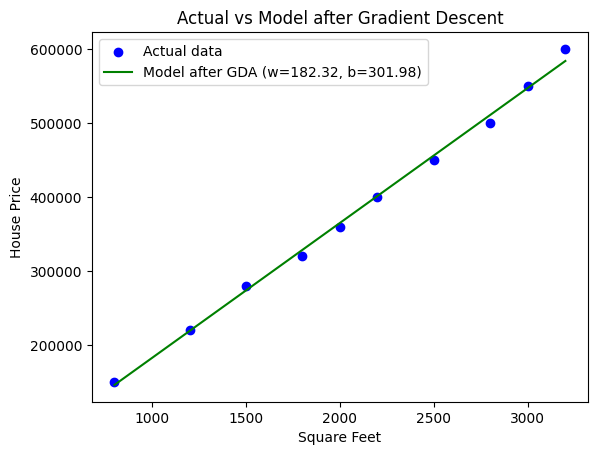

Final cost: 28935367.00


In [10]:
y_pred_final = compute_model_output(x, w_final, b_final)
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, y_pred_final, color='green', label=f'Model after GDA (w={w_final:.2f}, b={b_final:.2f})')
plt.xlabel('Square Feet')
plt.ylabel('House Price')
plt.title('Actual vs Model after Gradient Descent')
plt.legend()
plt.show()

final_cost = compute_cost(x, y, w_final, b_final)
print(f"Final cost: {final_cost:.2f}")


In [11]:

square_footage = 1200

predicted_price = w_final * square_footage + b_final

print(f"Predicted price for a {square_footage} sq. ft. house: ${predicted_price:.2f}")


Predicted price for a 1200 sq. ft. house: $219087.47
